In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from math import sqrt , ceil
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import Lasso

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/projects_data/ML_Assignment/weatherHistory.csv')
df1.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [3]:
df1 = df1.drop(columns=['Formatted Date','Daily Summary','Loud Cover'])
df1.head()

Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0  Partly Cloudy        rain         9.472222                  7.388889   
1  Partly Cloudy        rain         9.355556                  7.227778   
2  Mostly Cloudy        rain         9.377778                  9.377778   
3  Partly Cloudy        rain         8.288889                  5.944444   
4  Mostly Cloudy        rain         8.755556                  6.977778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89            14.1197                   251.0          15.8263   
1      0.86            14.2646                   259.0          15.8263   
2      0.89             3.9284                   204.0          14.9569   
3      0.83            14.1036                   269.0          15.8263   
4      0.83            11.0446                   259.0          15.8263   

   Pressure (millibars)  
0               1015.13  
1               1015.63  
2               1015.94  
3               1016.41  
4               1016.51

Handle Missing Value

In [4]:
missing_values = df1.isna().sum()
print(missing_values)

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64


In [5]:
df1 = df1.dropna()

Handle Outliers

In [6]:
feature_names = ["Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]

for feature_name in feature_names:
    Q1 = df1[feature_name].quantile(0.25)
    Q3 = df1[feature_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df1 = df1[(df1[feature_name] >= lower_bound) & (df1[feature_name] <= upper_bound)].dropna()

In [7]:
df1.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     88670.000000              88670.000000  88670.000000   
mean         12.375807                 11.395068      0.734215   
std           9.483142                 10.573942      0.196144   
min         -21.822222                -22.416667      0.170000   
25%           5.000000                  2.933333      0.600000   
50%          12.327778                 12.327778      0.780000   
75%          19.044444                 19.044444      0.890000   
max          38.983333                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count       88670.000000            88670.000000     88670.000000   
mean           10.135426              186.577163        10.475150   
std             5.836954              107.278915         4.150998   
min             0.000000                0.000000         0.000000   
25%             5.554500              113.000000         8.903300   
50%             9.660000              180.000000        10.046400   
75%            13.813800              289.000000        14.908600   
max            26.597200              359.000000        16.100000   

       Pressure (millibars)  
count          88670.000000  
mean            1016.772873  
std                6.724339  
min              998.480000  
25%             1012.350000  
50%             1016.560000  
75%             1020.910000  
max             1034.750000

Feature Transform

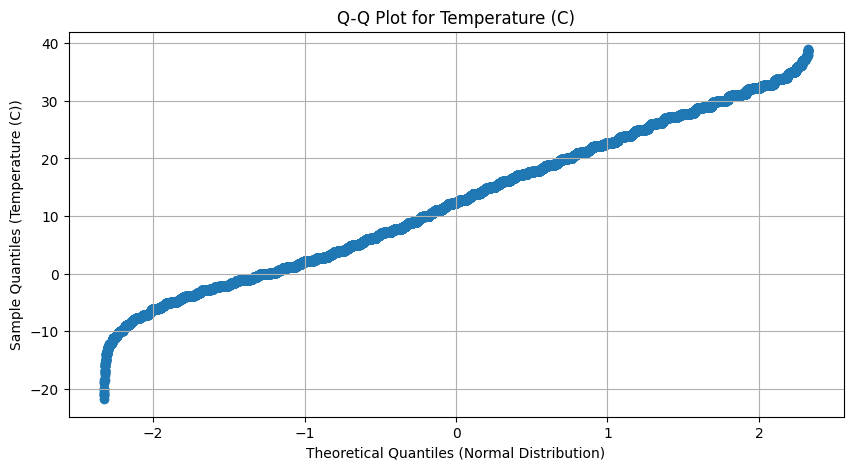

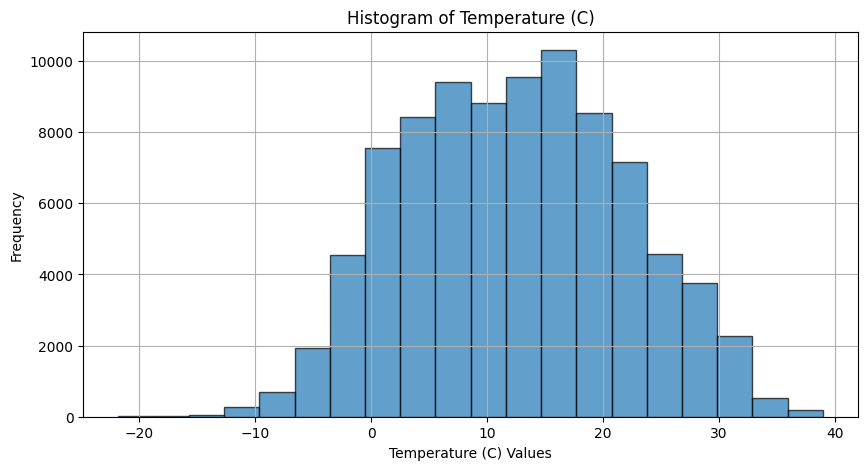

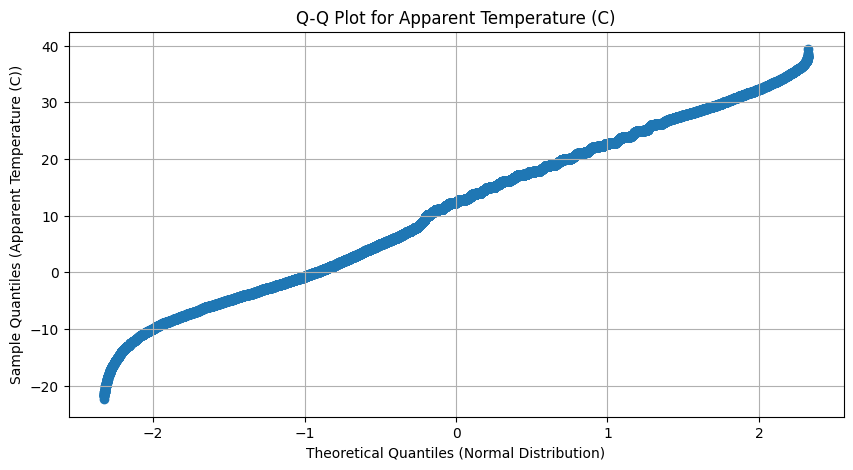

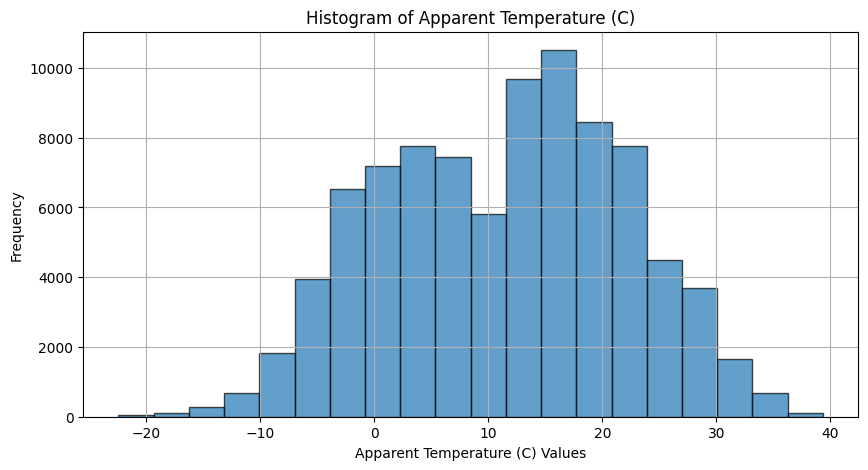

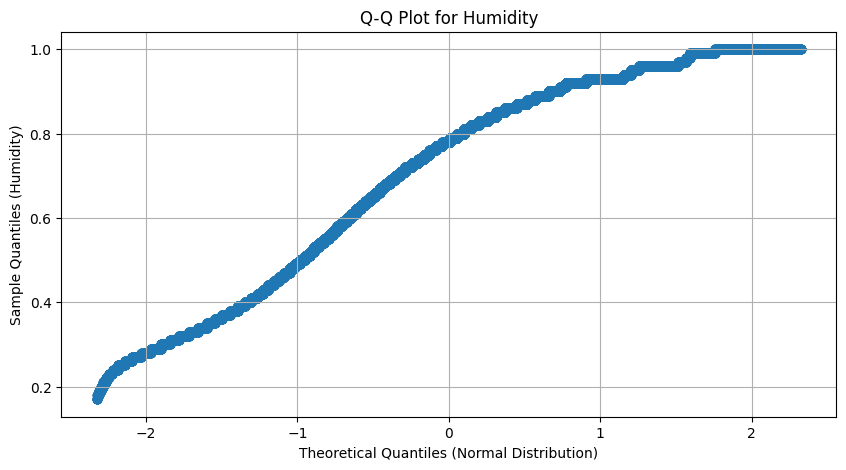

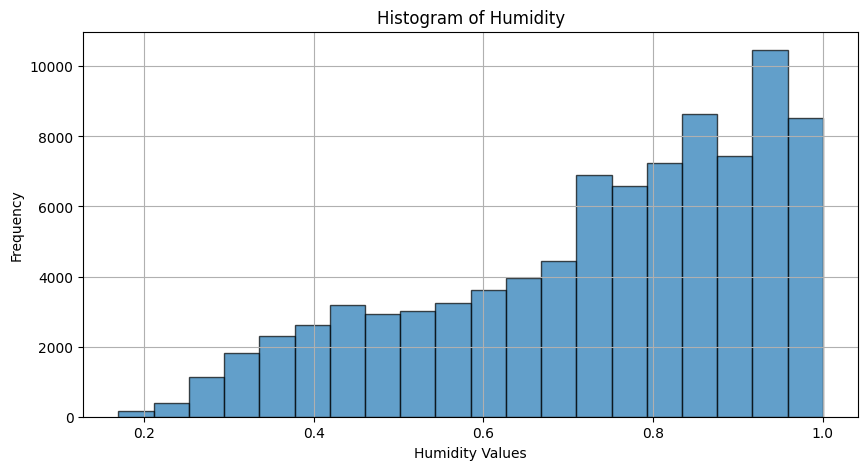

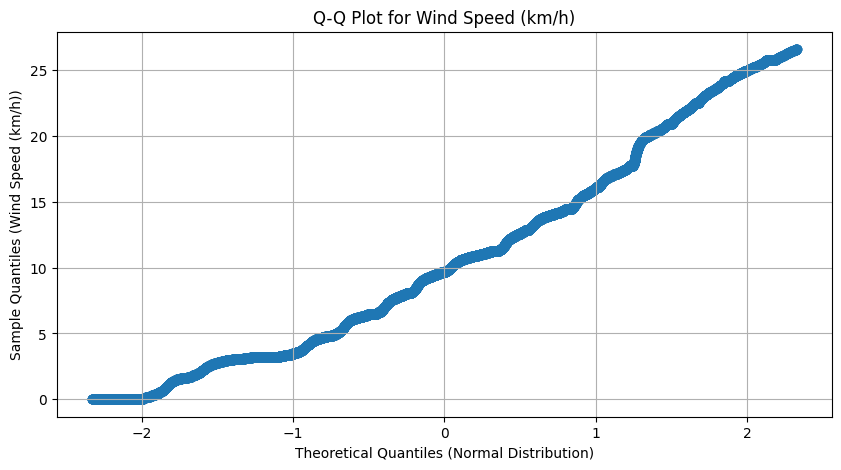

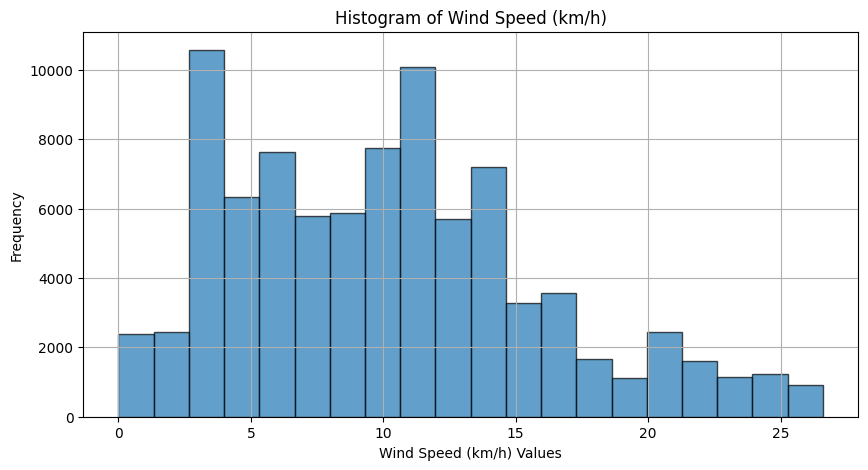

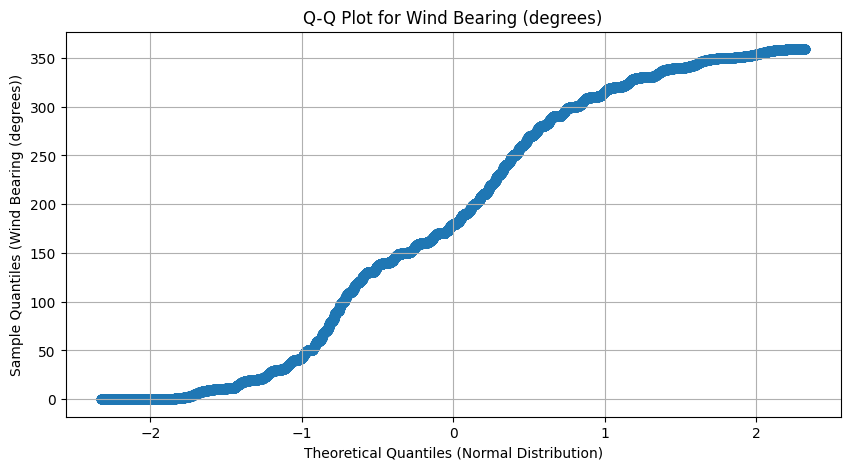

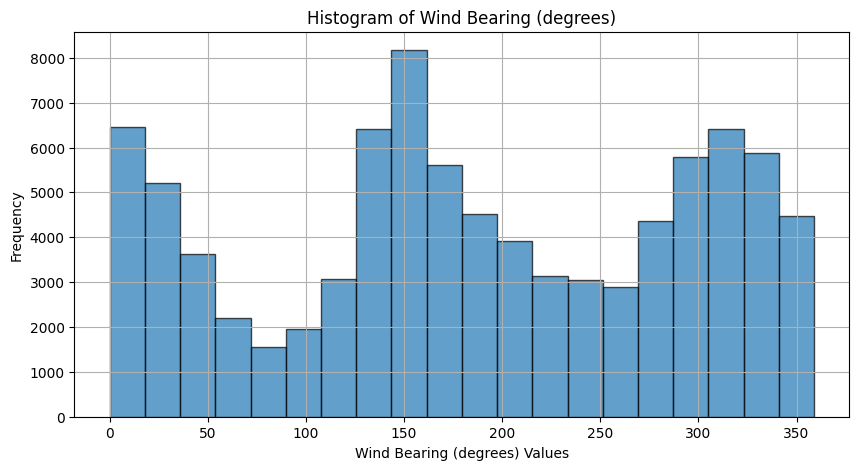

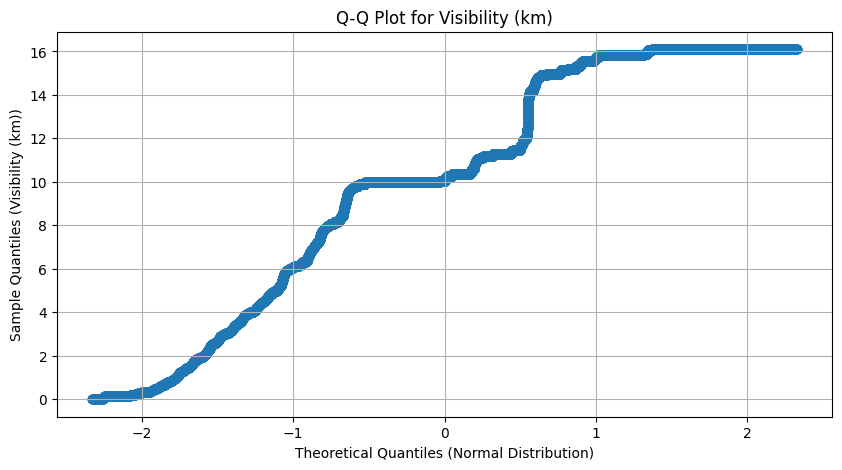

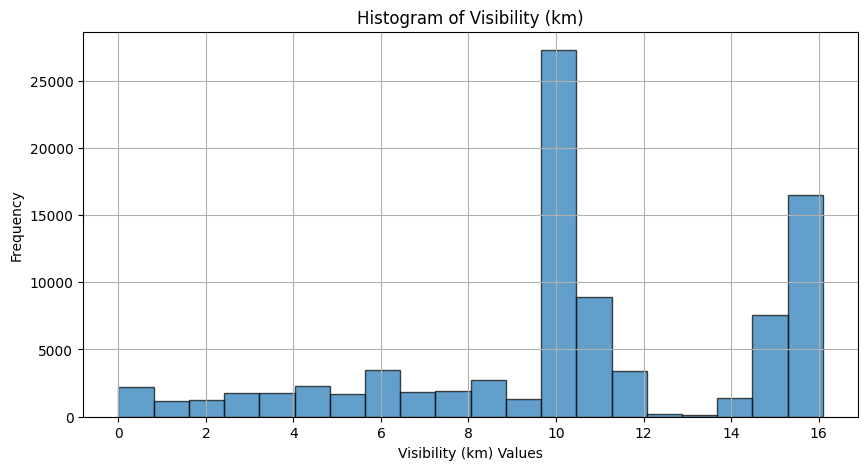

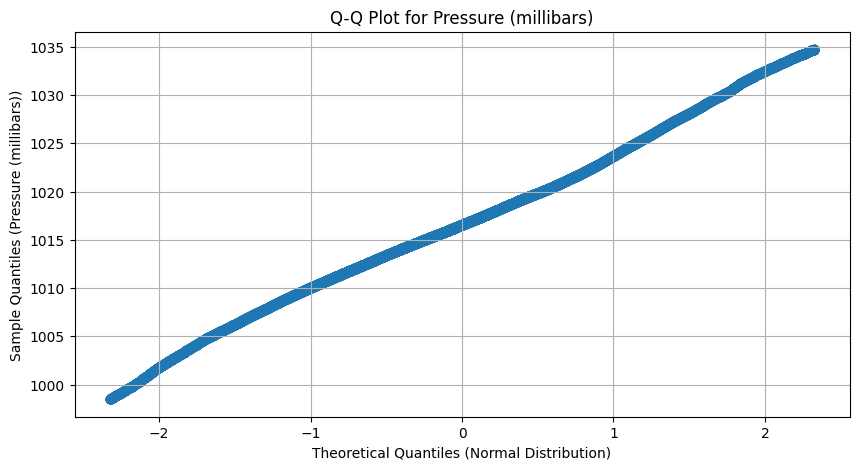

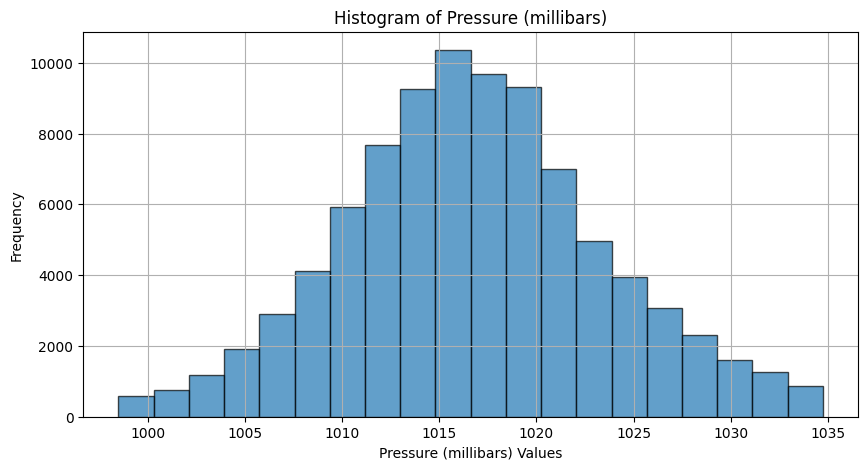

In [8]:
feature_names = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']

for feature_name in feature_names:
    feature_data = df1[feature_name]

    sorted_data = np.sort(feature_data)
    normal_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(feature_data)))

    plt.figure(figsize=(10, 5))
    plt.scatter(normal_quantiles, sorted_data)
    plt.title(f'Q-Q Plot for {feature_name}')
    plt.xlabel('Theoretical Quantiles (Normal Distribution)')
    plt.ylabel(f'Sample Quantiles ({feature_name})')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.hist(feature_data, bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {feature_name}')
    plt.xlabel(f'{feature_name} Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [9]:

min_val = df1['Humidity'].min()
transformed_data, _ = stats.boxcox(df1['Humidity'] - min_val + 1)
df1['Humidity'] = transformed_data

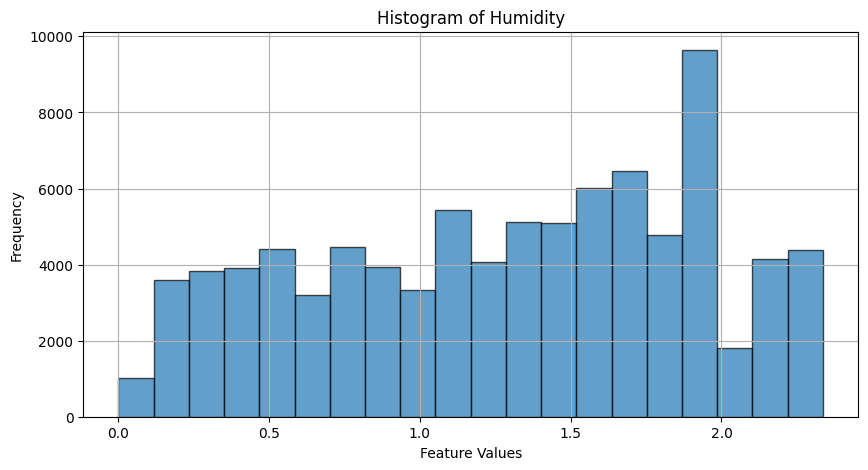

In [10]:
feature_data = df1['Humidity']
sorted_data = np.sort(feature_data)
normal_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(feature_data)))

plt.figure(figsize=(10, 5))
plt.hist(feature_data, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Humidity')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
min_val = df1['Wind Speed (km/h)'].min()
transformed_data, _ = stats.boxcox(df1['Wind Speed (km/h)'] - min_val + 1)
df1['Wind Speed (km/h)'] = transformed_data

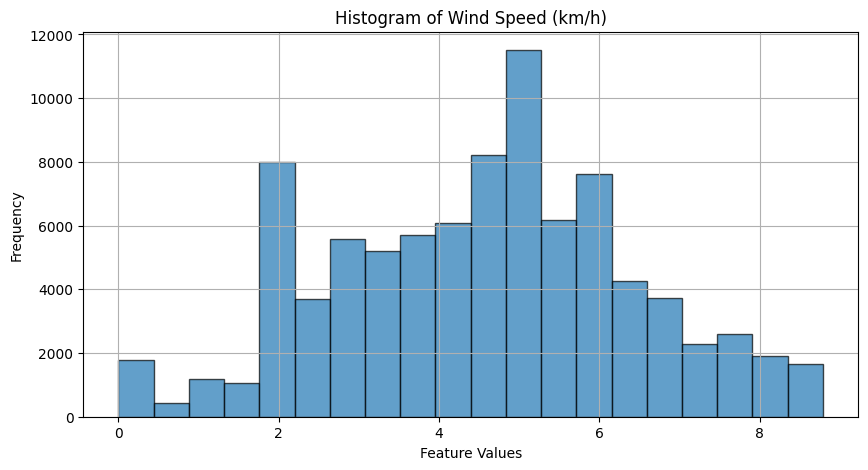

In [12]:
feature_data = df1['Wind Speed (km/h)']
sorted_data = np.sort(feature_data)
normal_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(feature_data)))

plt.figure(figsize=(10, 5))
plt.hist(feature_data, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Wind Speed (km/h)')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Extract Labels

In [13]:
Y = df1['Temperature (C)']
df1 = df1.drop(columns=['Temperature (C)'])
print(df1)

             Summary Precip Type  Apparent Temperature (C)  Humidity  \
0      Partly Cloudy        rain                  7.388889  1.792691   
1      Partly Cloudy        rain                  7.227778  1.660207   
2      Mostly Cloudy        rain                  9.377778  1.792691   
3      Partly Cloudy        rain                  5.944444  1.534110   
4      Mostly Cloudy        rain                  6.977778  1.534110   
...              ...         ...                       ...       ...   
96448  Partly Cloudy        rain                 26.016667  0.369359   
96449  Partly Cloudy        rain                 24.583333  0.469877   
96450  Partly Cloudy        rain                 22.038889  0.654461   
96451  Partly Cloudy        rain                 21.522222  0.758570   
96452  Partly Cloudy        rain                 20.438889  0.785898   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0               5.926499                   251.0          15.8263 

Non-numeric to numeric

In [14]:
non_numeric_columns = ['Summary' , 'Precip Type']
for non_numeric in non_numeric_columns:
  unique_values = df1[non_numeric].unique()
  print(non_numeric ,len(list(unique_values)) )
  classes = {}
  for value in list(unique_values):
    classes[value] = list(unique_values).index(value)
  print(classes)
  df1[non_numeric] = df1[non_numeric].map(classes)
print(df1)

Summary 14
{'Partly Cloudy': 0, 'Mostly Cloudy': 1, 'Overcast': 2, 'Foggy': 3, 'Clear': 4, 'Humid and Mostly Cloudy': 5, 'Humid and Partly Cloudy': 6, 'Dry and Partly Cloudy': 7, 'Dry': 8, 'Humid and Overcast': 9, 'Light Rain': 10, 'Drizzle': 11, 'Dry and Mostly Cloudy': 12, 'Rain': 13}
Precip Type 2
{'rain': 0, 'snow': 1}
       Summary  Precip Type  Apparent Temperature (C)  Humidity  \
0            0            0                  7.388889  1.792691   
1            0            0                  7.227778  1.660207   
2            1            0                  9.377778  1.792691   
3            0            0                  5.944444  1.534110   
4            1            0                  6.977778  1.534110   
...        ...          ...                       ...       ...   
96448        0            0                 26.016667  0.369359   
96449        0            0                 24.583333  0.469877   
96450        0            0                 22.038889  0.654461   
96451

Correlation Analysis

In [15]:
df1.corr()

Summary  Precip Type  Apparent Temperature (C)  \
Summary                   1.000000     0.162052                 -0.254058   
Precip Type               0.162052     1.000000                 -0.552599   
Apparent Temperature (C) -0.254058    -0.552599                  1.000000   
Humidity                  0.298475     0.242313                 -0.600766   
Wind Speed (km/h)        -0.106688    -0.053124                 -0.036709   
Wind Bearing (degrees)   -0.047260    -0.031158                  0.025468   
Visibility (km)          -0.266926    -0.310848                  0.381087   
Pressure (millibars)      0.108242     0.252185                 -0.290978   

                          Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
Summary                   0.298475          -0.106688               -0.047260   
Precip Type               0.242313          -0.053124               -0.031158   
Apparent Temperature (C) -0.600766          -0.036709                0.025468   
Humidity                  1.000000          -0.242740                0.008559   
Wind Speed (km/h)        -0.242740           1.000000                0.092625   
Wind Bearing (degrees)    0.008559           0.092625                1.000000   
Visibility (km)          -0.425557           0.095047                0.051283   
Pressure (millibars)      0.036792          -0.197612               -0.074156   

                          Visibility (km)  Pressure (millibars)  
Summary                         -0.266926              0.108242  
Precip Type                     -0.310848              0.252185  
Apparent Temperature (C)         0.381087             -0.290978  
Humidity                        -0.425557              0.036792  
Wind Speed (km/h)                0.095047             -0.197612  
Wind Bearing (degrees)           0.051283             -0.074156  
Visibility (km)                  1.000000             -0.144155  
Pressure (millibars)            -0.144155              1.000000

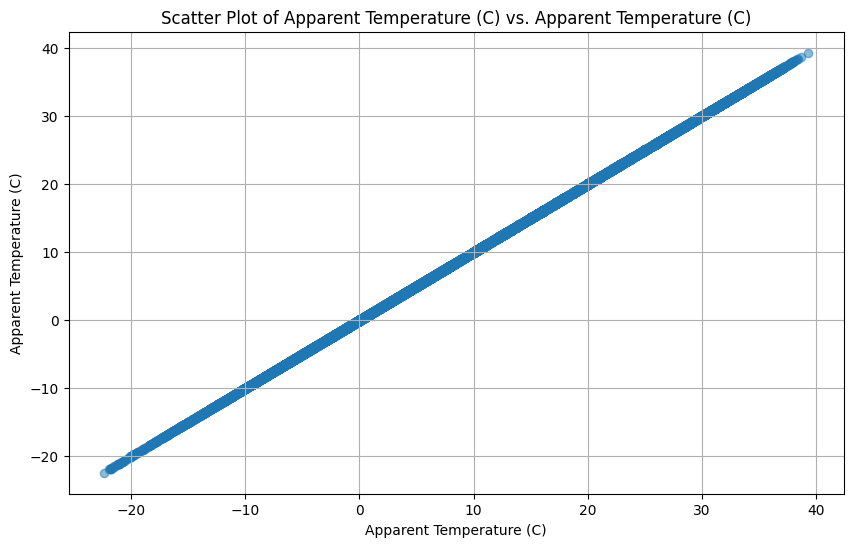

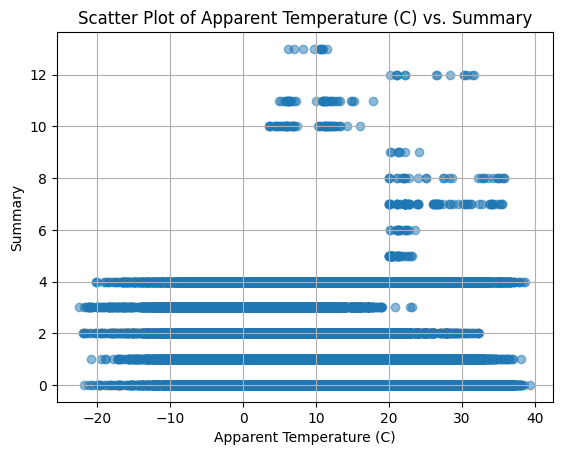

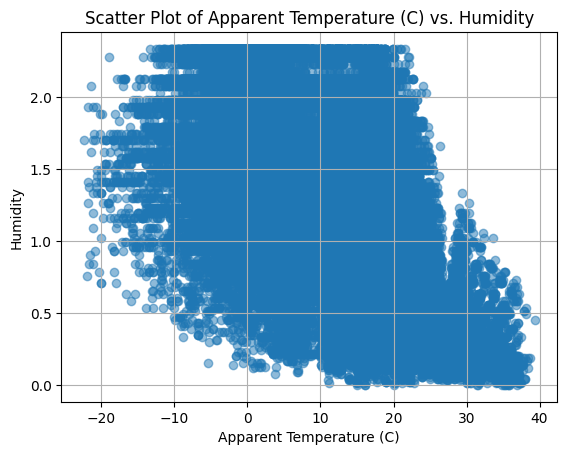

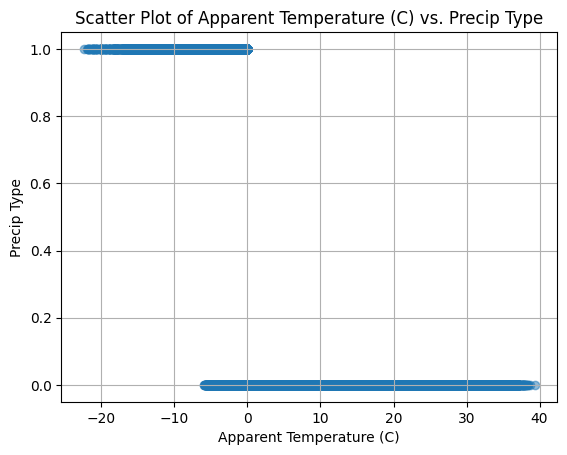

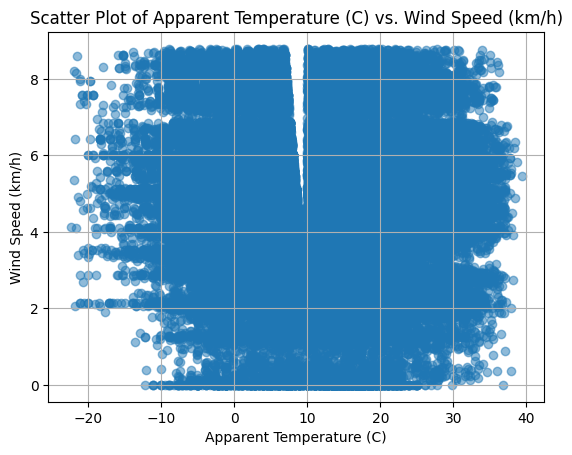

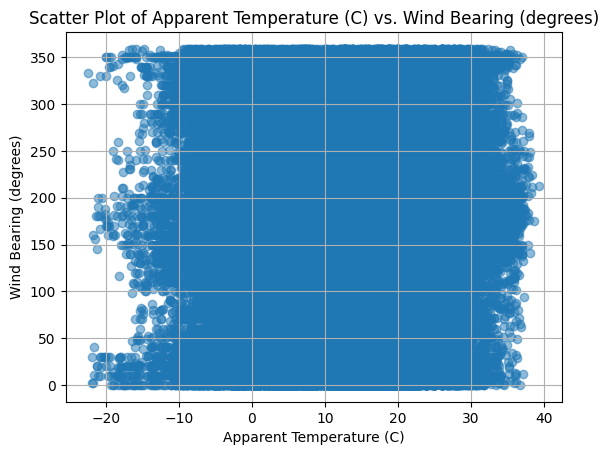

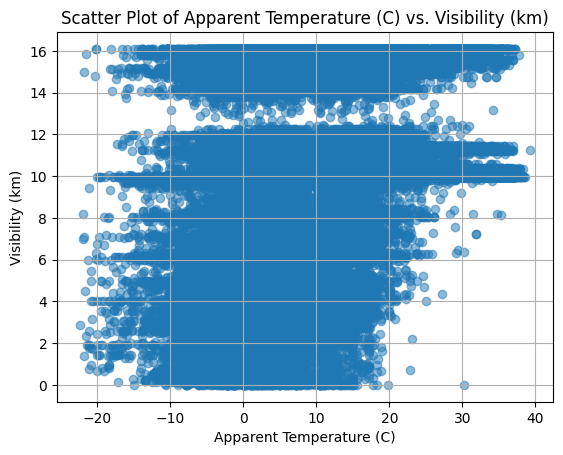

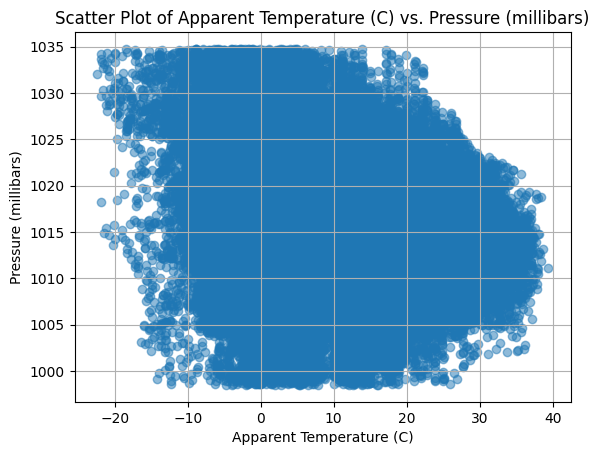

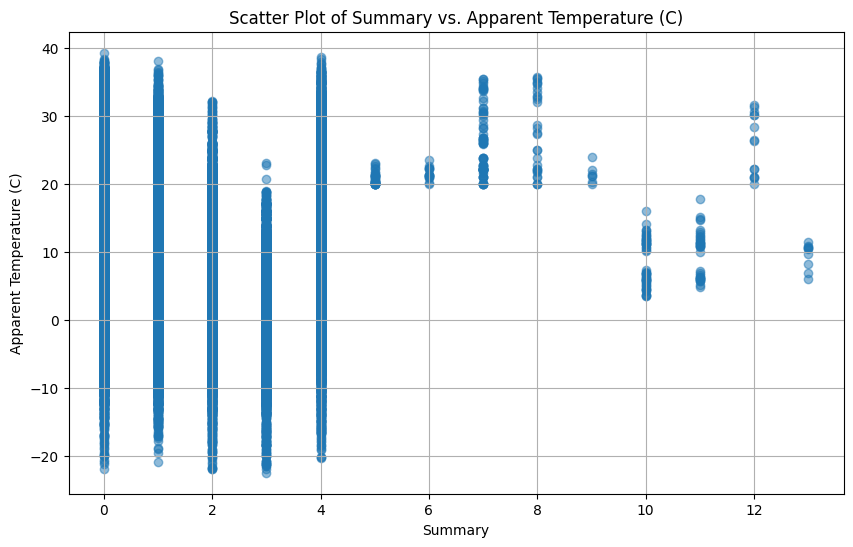

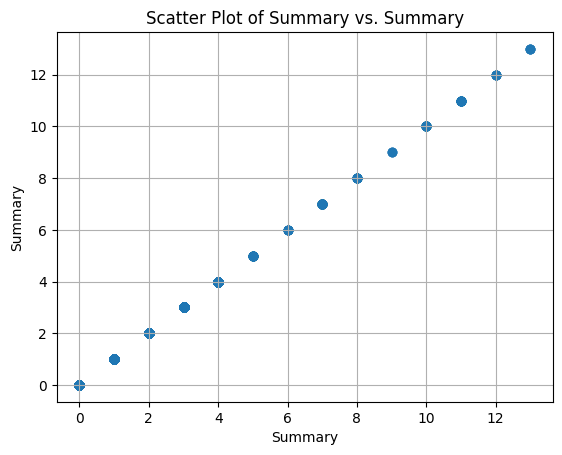

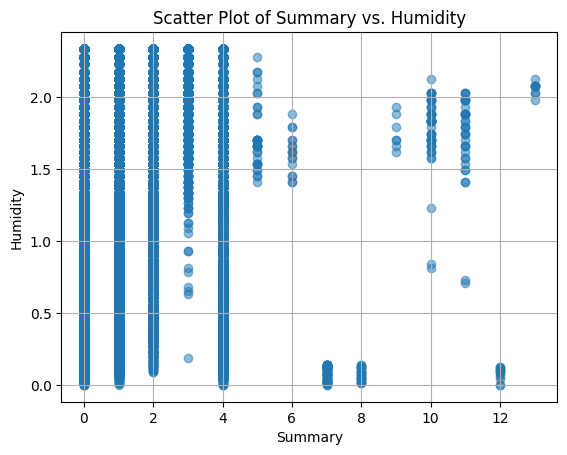

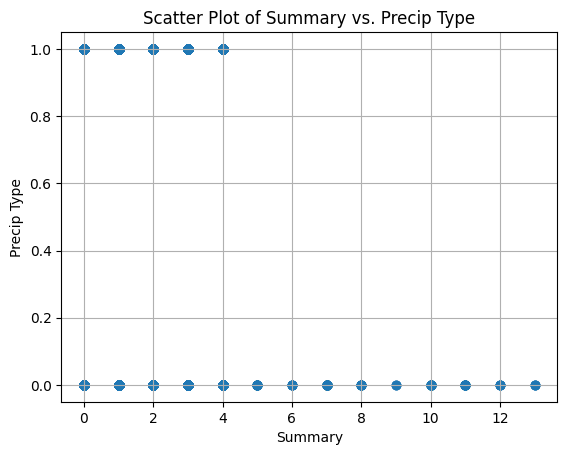

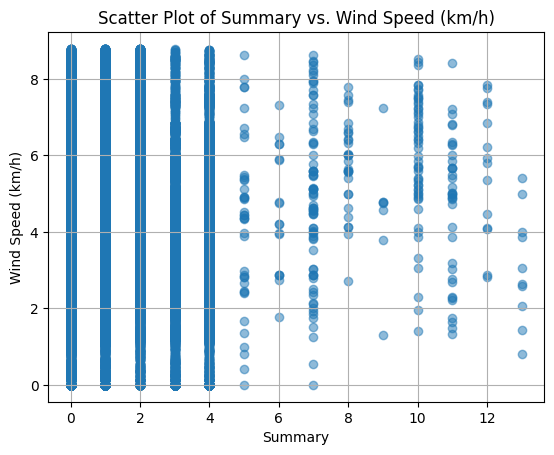

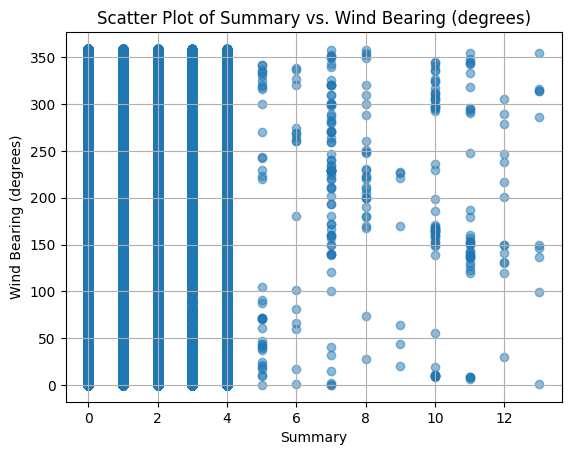

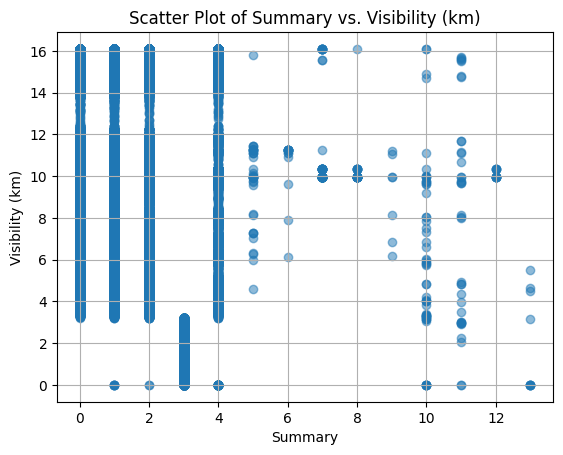

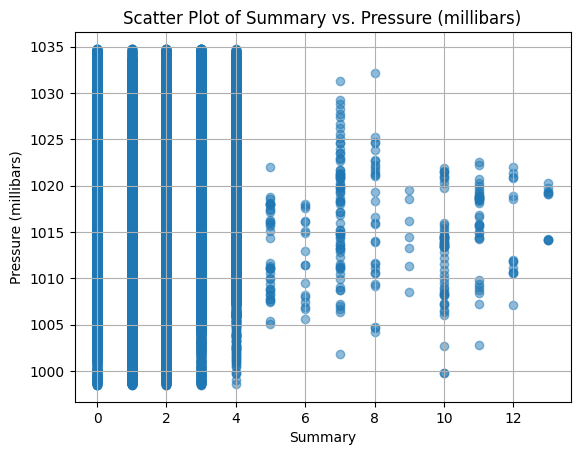

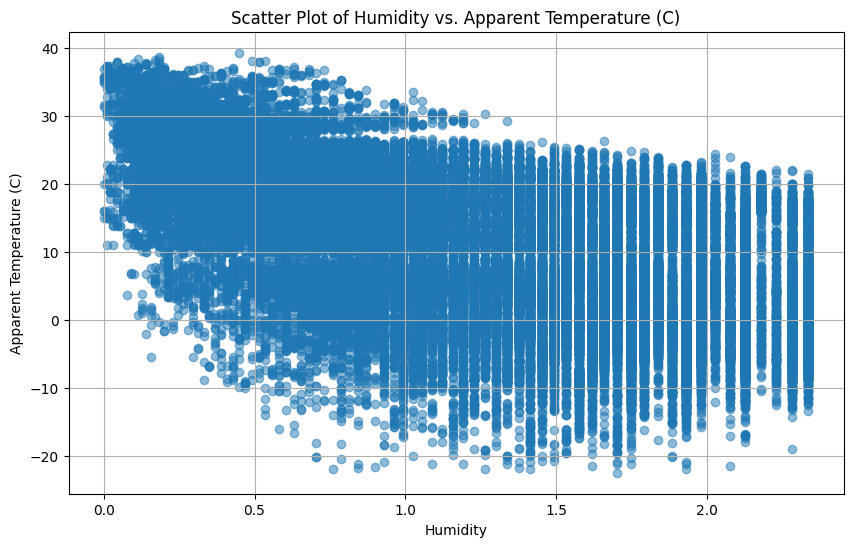

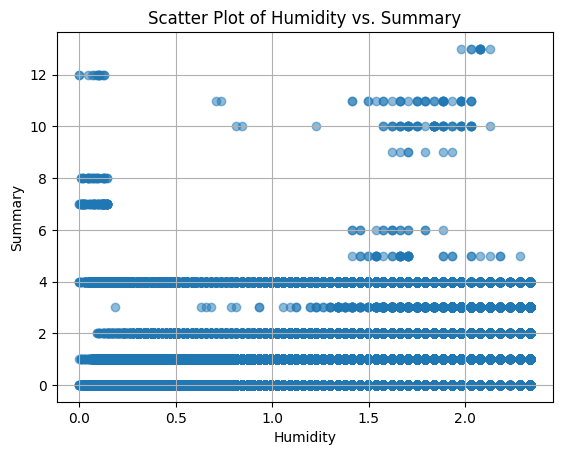

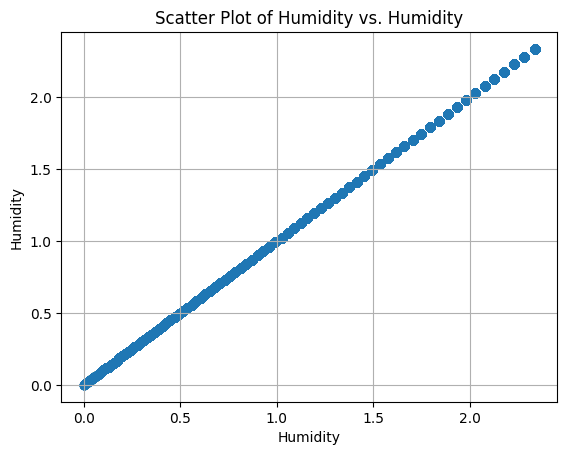

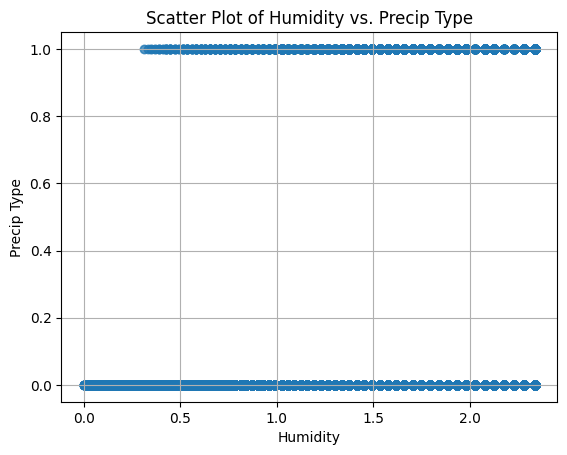

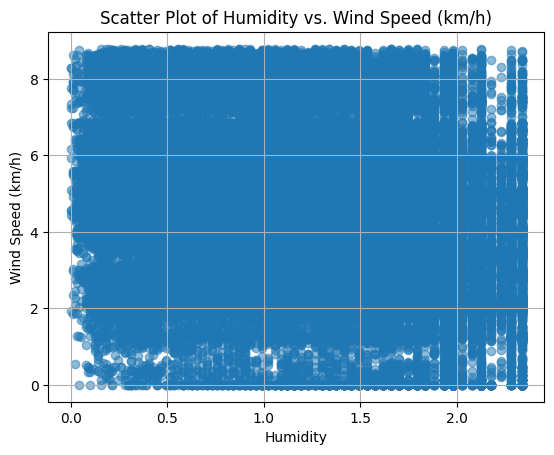

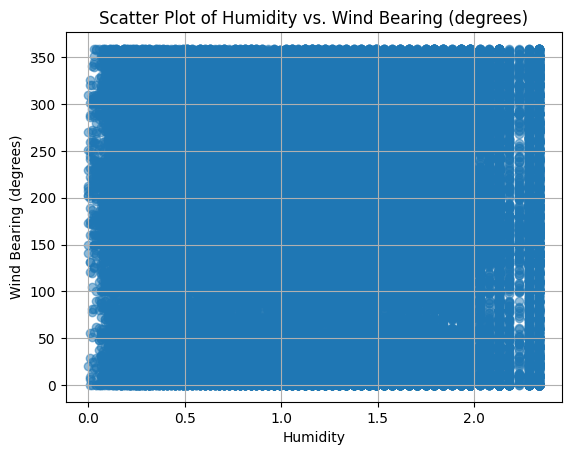

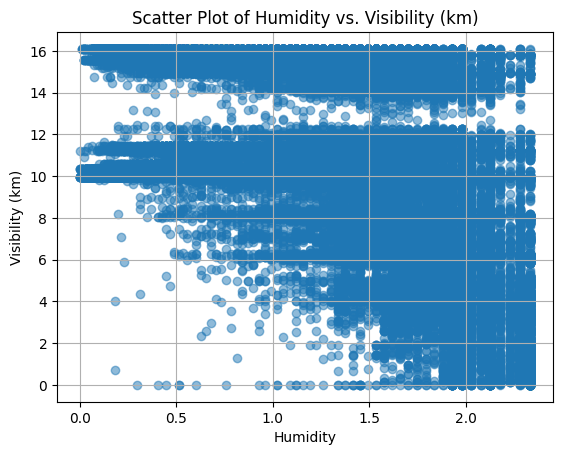

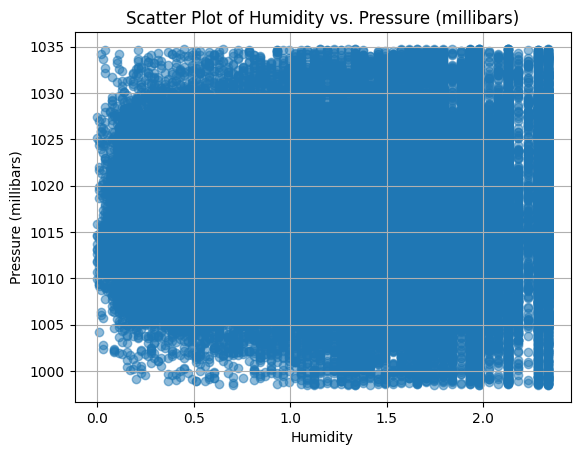

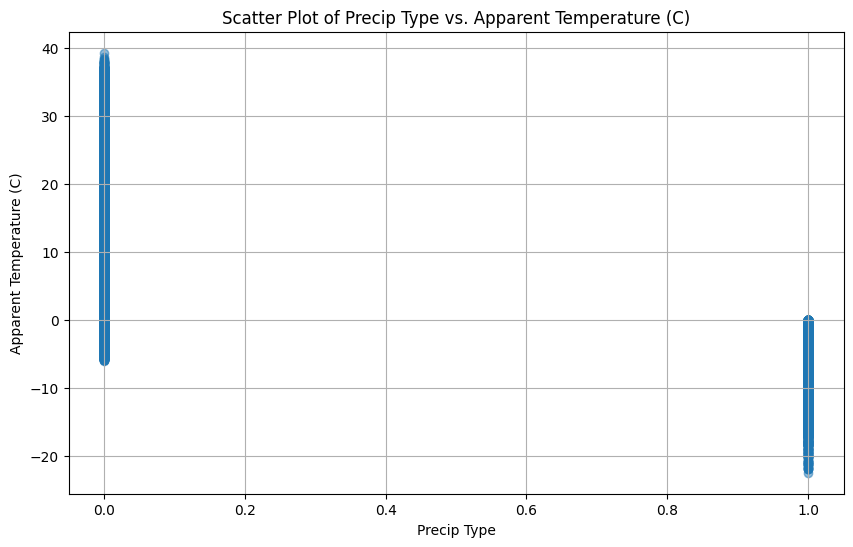

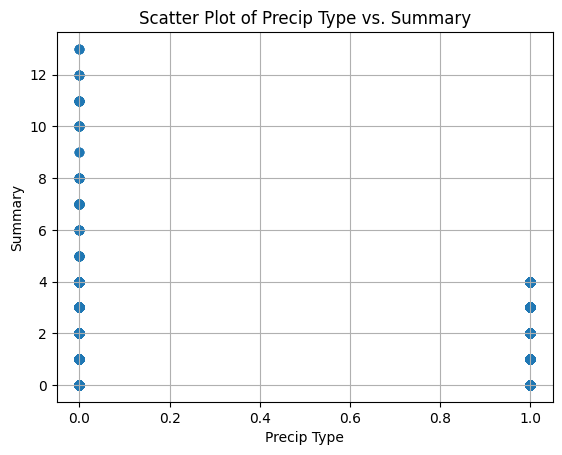

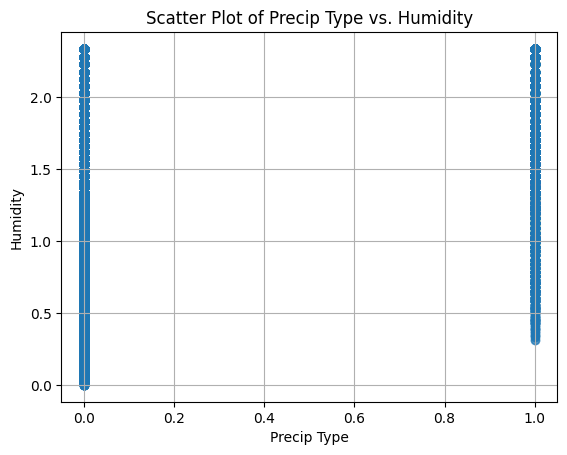

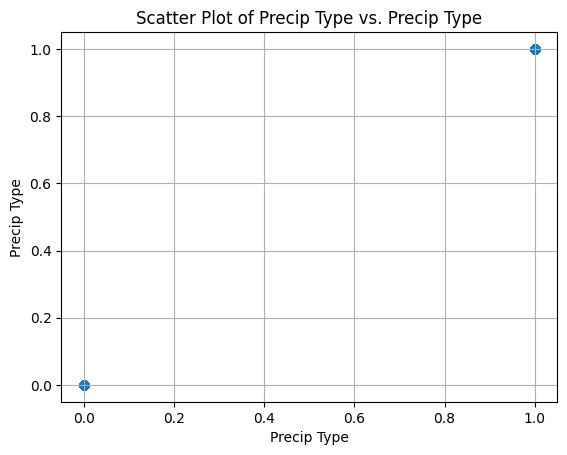

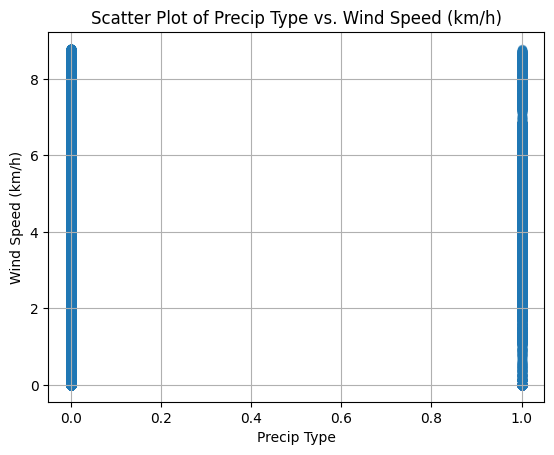

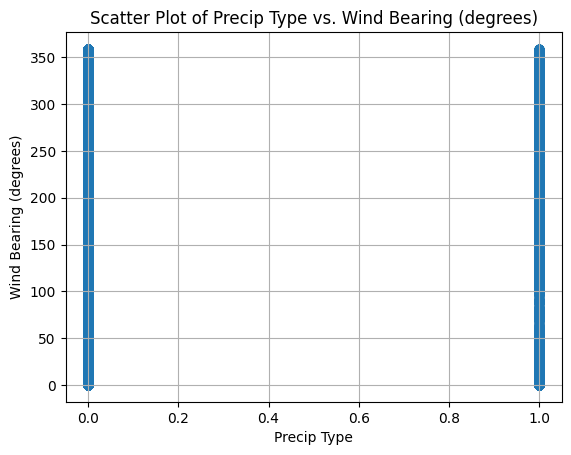

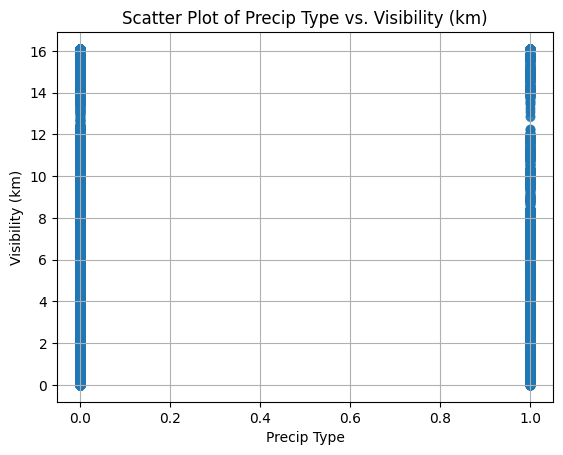

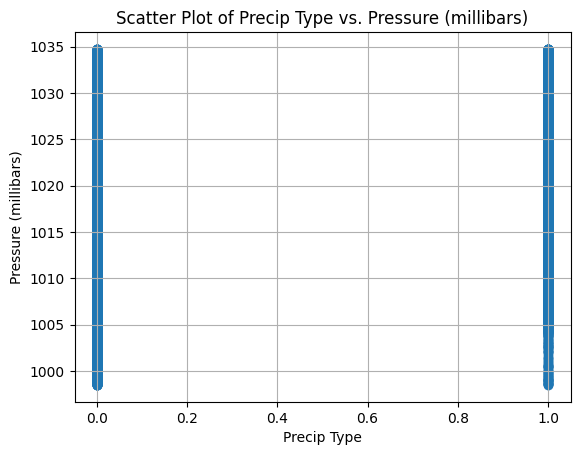

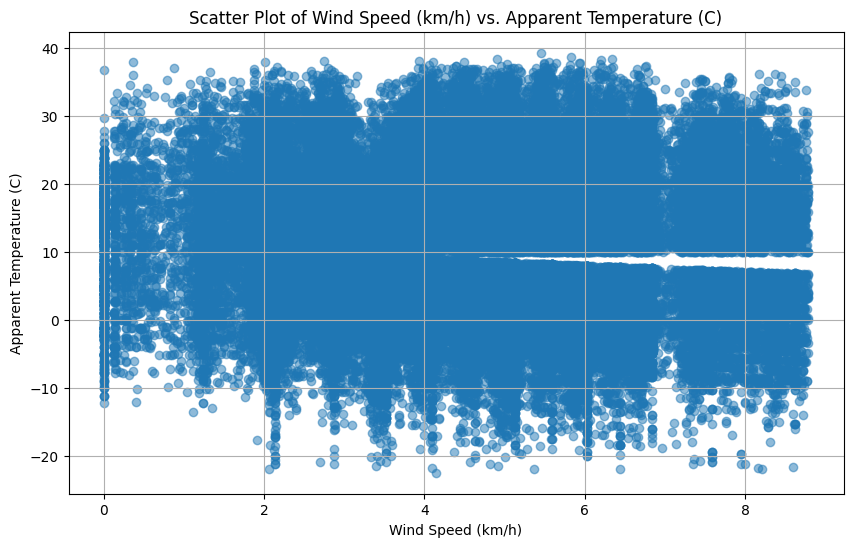

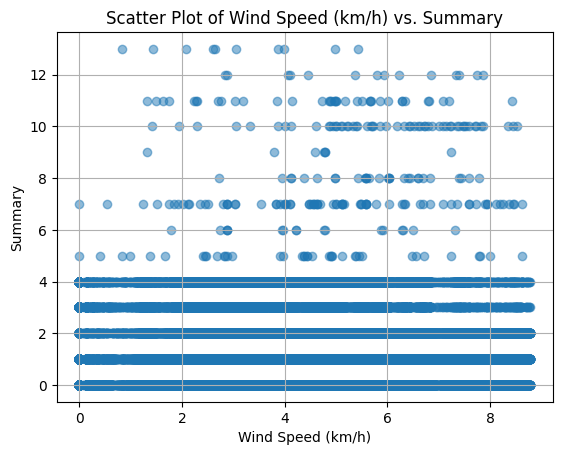

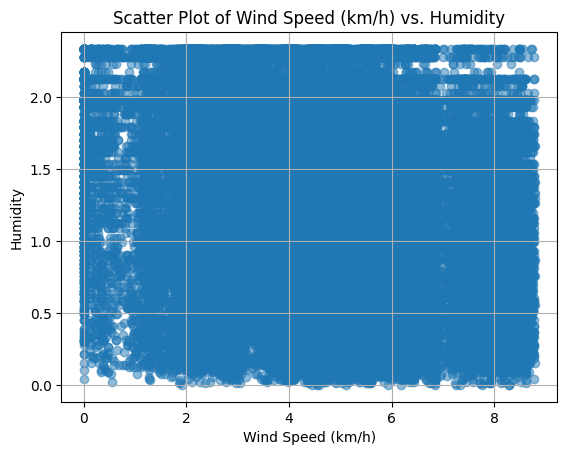

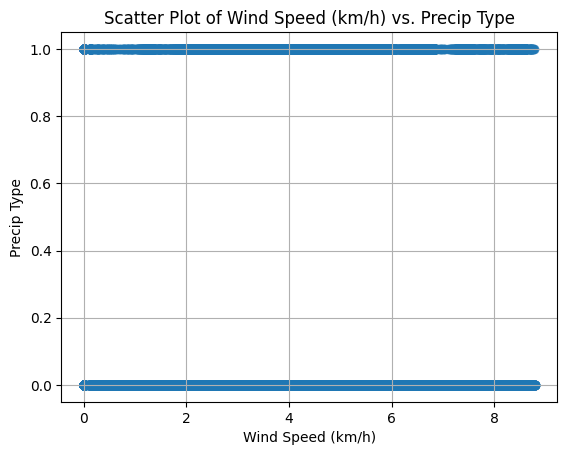

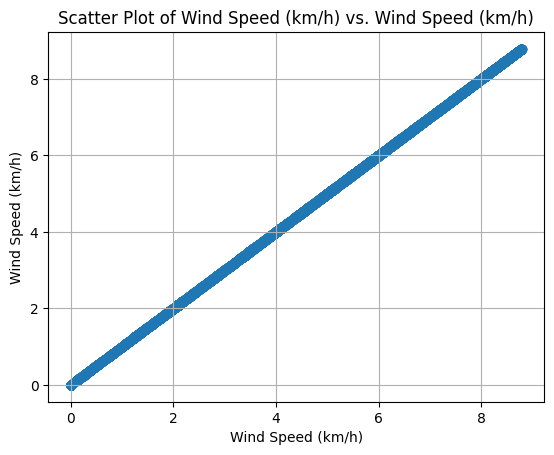

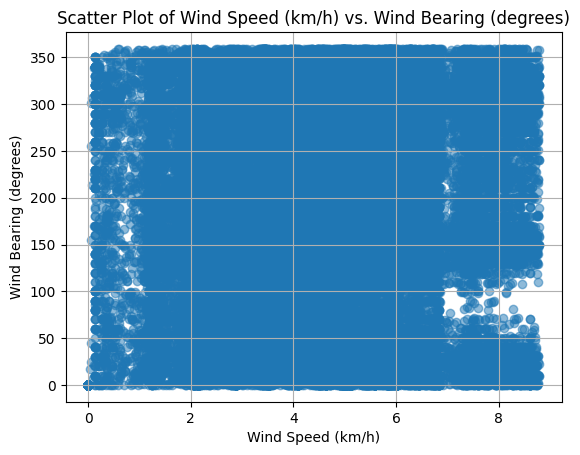

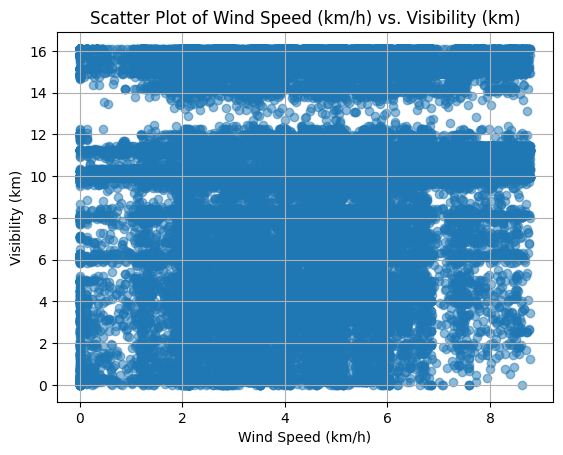

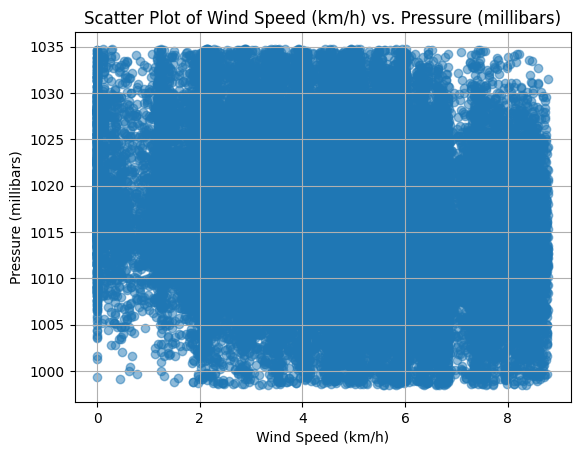

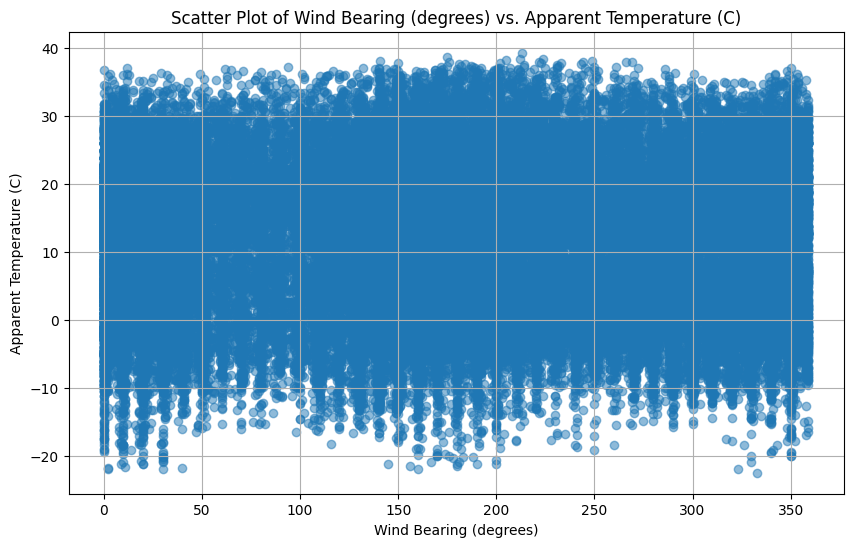

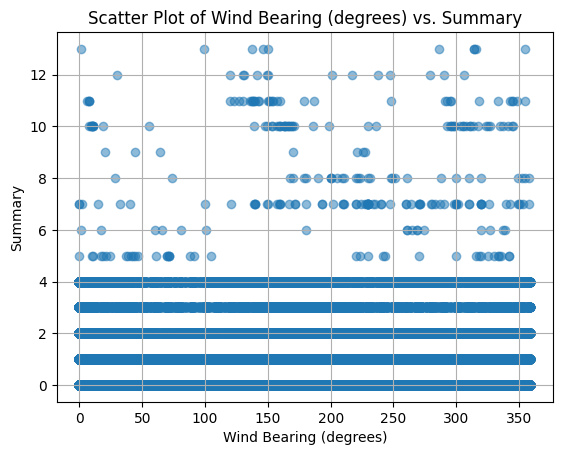

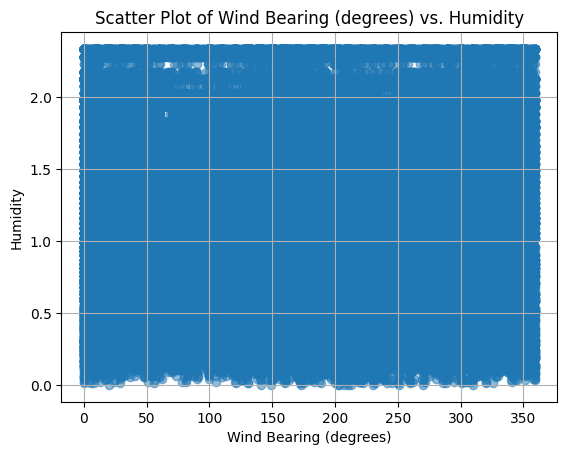

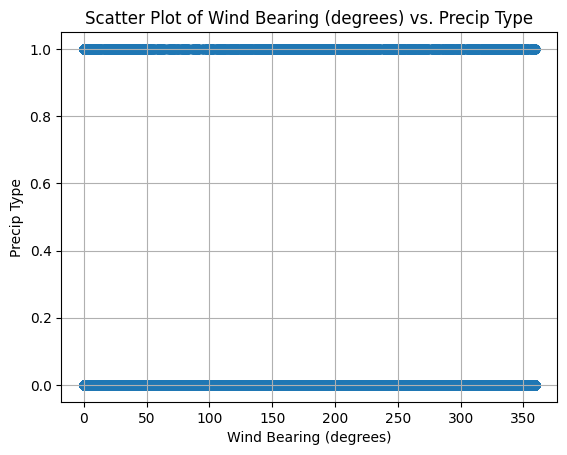

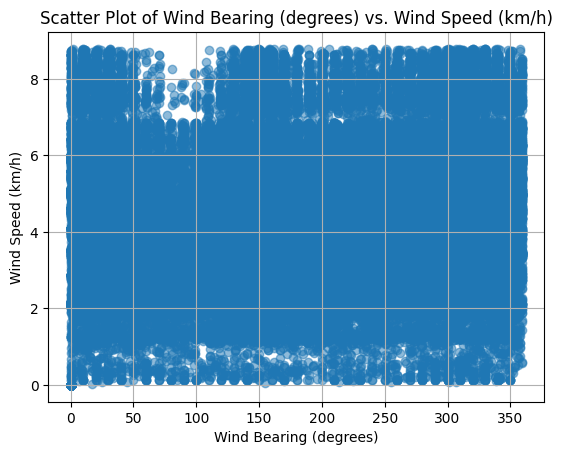

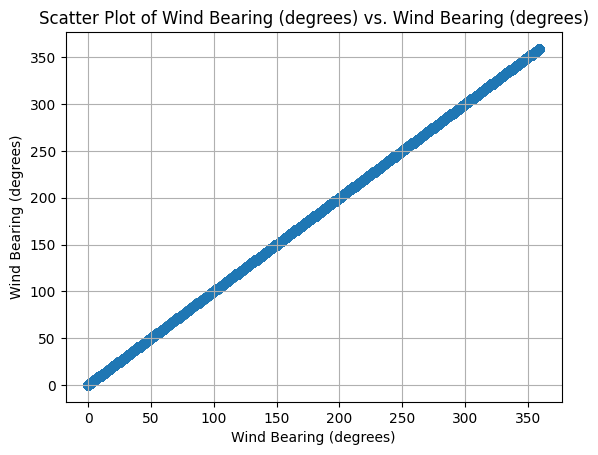

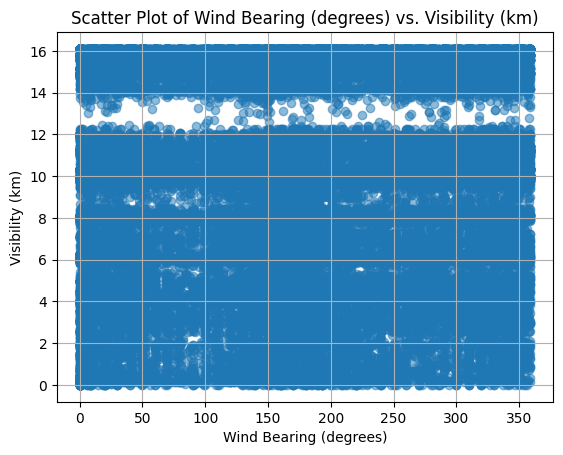

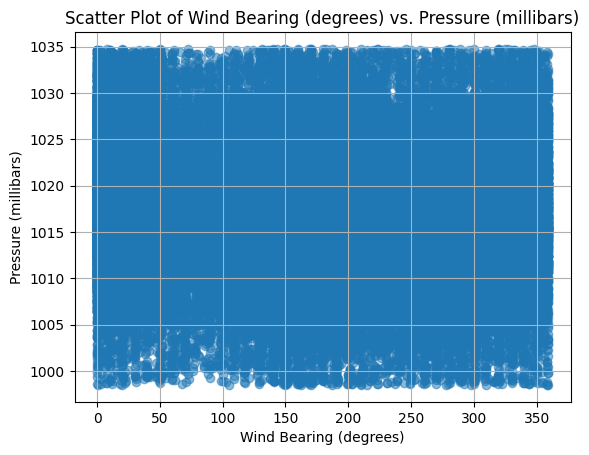

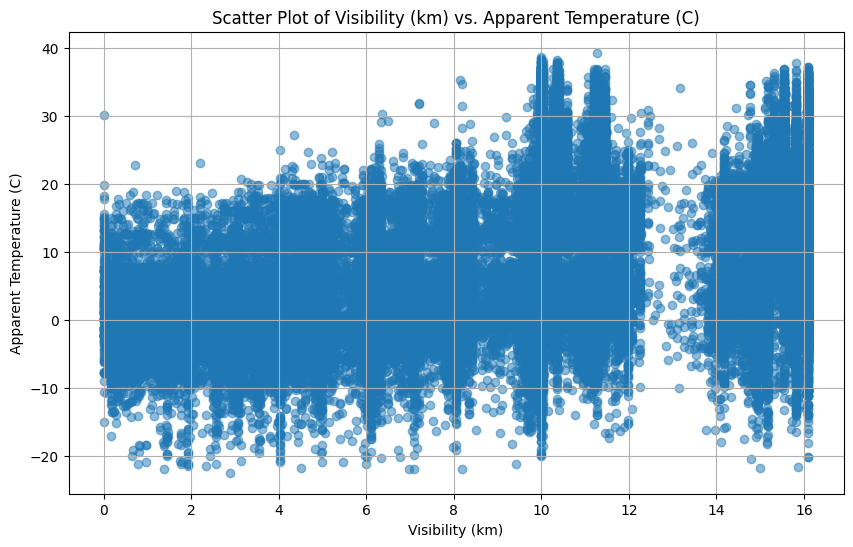

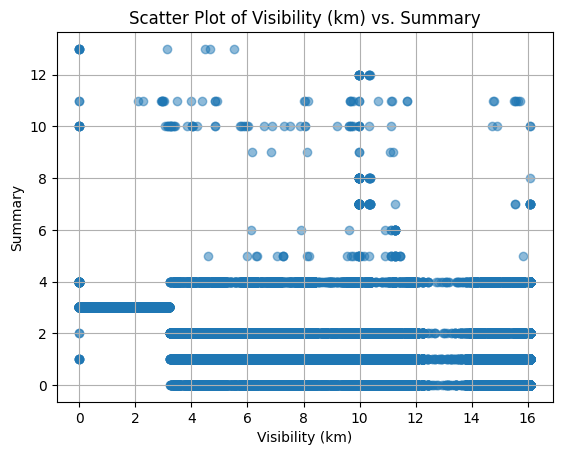

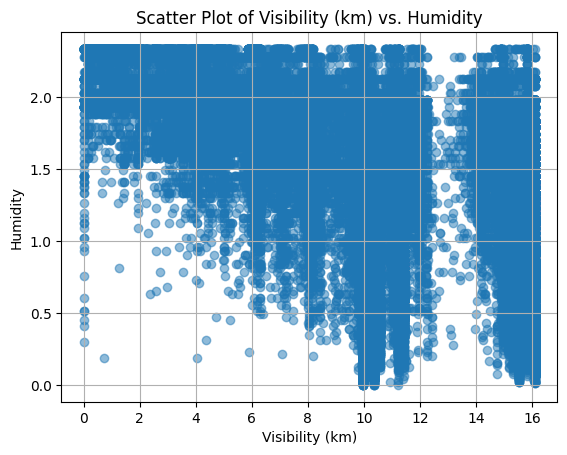

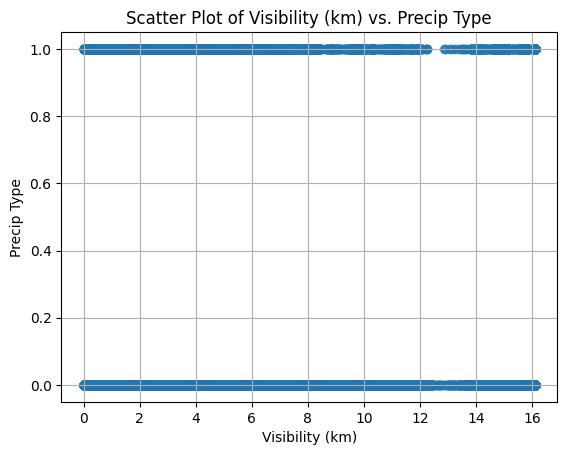

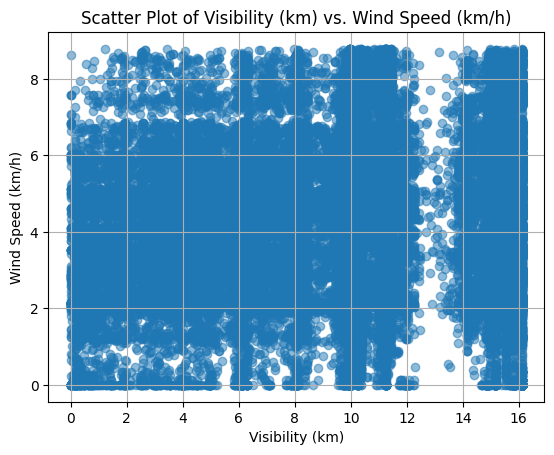

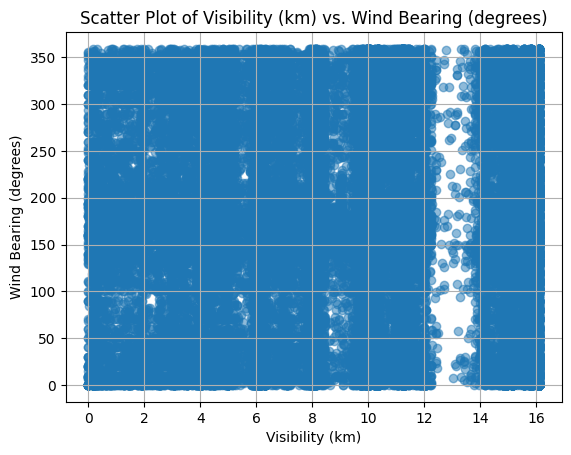

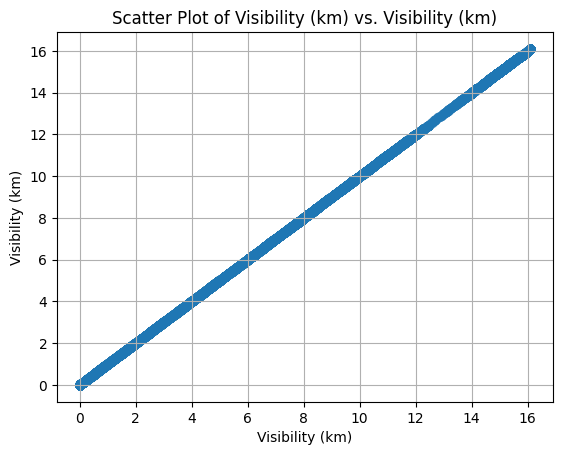

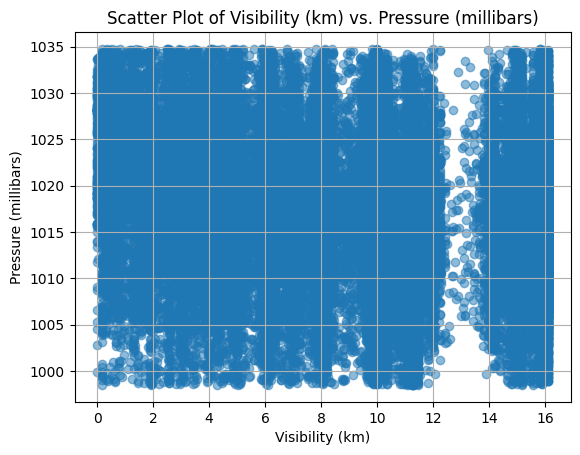

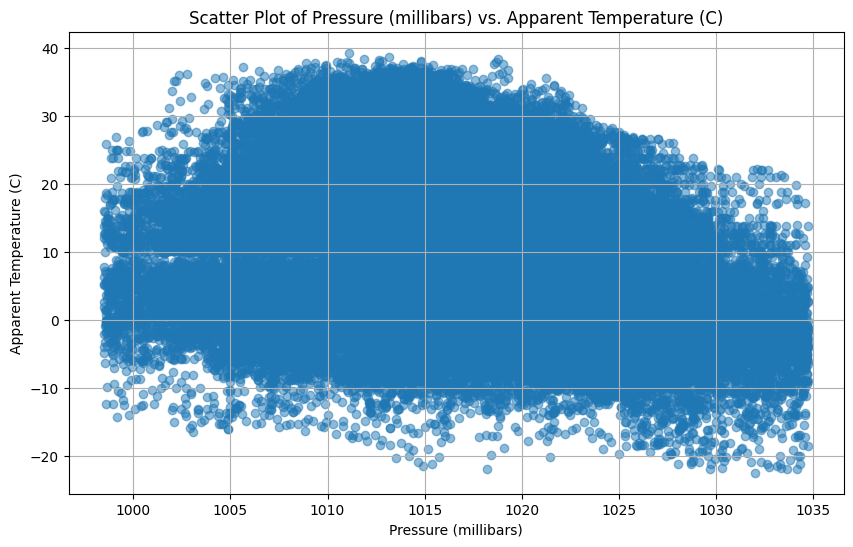

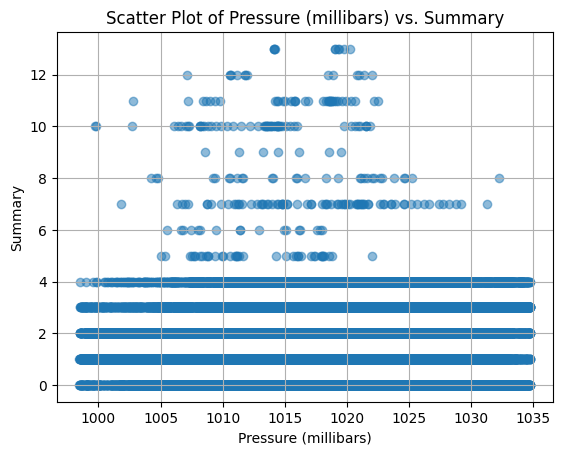

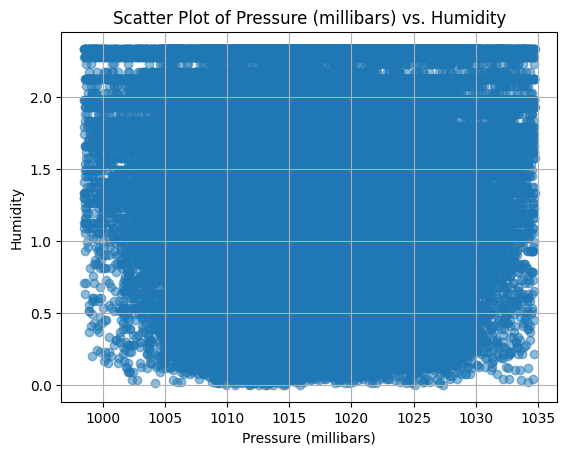

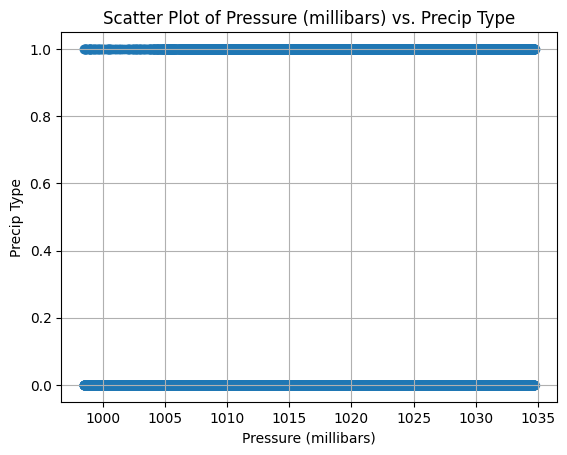

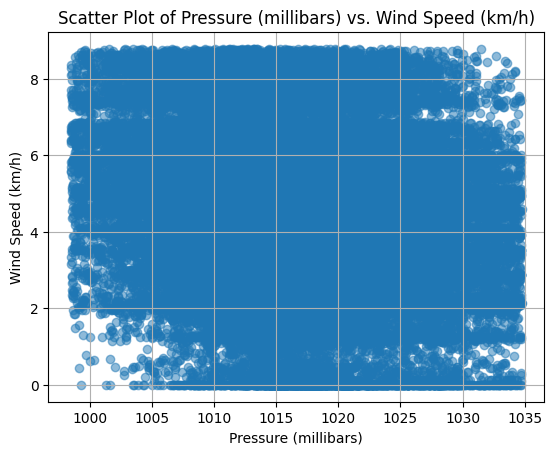

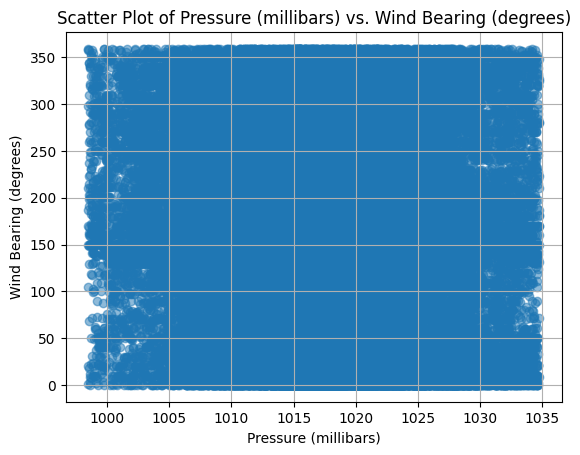

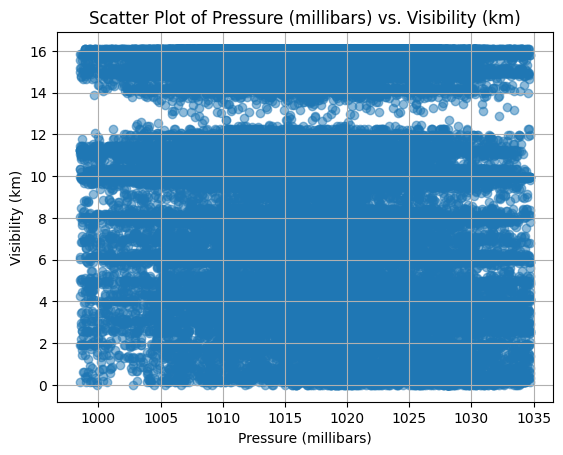

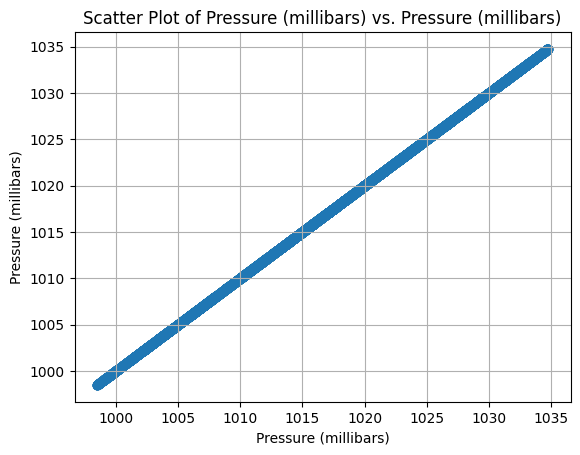

In [16]:


columns_of_interest = [
    'Apparent Temperature (C)',
    'Summary',
    'Humidity',
    'Precip Type',
    'Wind Speed (km/h)',
    'Wind Bearing (degrees)',
    'Visibility (km)',
    'Pressure (millibars)'
]

for column in columns_of_interest:
    plt.figure(figsize=(10, 6))
    for column2 in columns_of_interest:
      plt.scatter(df1[column], df1[column2], alpha=0.5)
      plt.title(f'Scatter Plot of {column} vs. {column2}')
      plt.xlabel(column)
      plt.ylabel(column2)
      plt.grid(True)
      plt.show()

In [18]:
df1.head()

Summary  Precip Type  Apparent Temperature (C)  Humidity  \
0        0            0                  7.388889  1.792691   
1        0            0                  7.227778  1.660207   
2        1            0                  9.377778  1.792691   
3        0            0                  5.944444  1.534110   
4        1            0                  6.977778  1.534110   

   Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0           5.926499                   251.0          15.8263   
1           5.965267                   259.0          15.8263   
2           2.474217                   204.0          14.9569   
3           5.922181                   269.0          15.8263   
4           5.056540                   259.0          15.8263   

   Pressure (millibars)  
0               1015.13  
1               1015.63  
2               1015.94  
3               1016.41  
4               1016.51

PCA Feature Reducing

In [33]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
print(scaled_data)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(scaled_data, Y, random_state=10, test_size=.20)
k = 0.99
pca = PCA(n_components=k)
pca_train = pca.fit_transform(Xtrain)
pca_test = pca.fit_transform(Xtest)
print(pca_train)

[[-0.96114362 -0.33504326 -0.37887494 ...  0.60052062  1.28913095
  -0.24431875]
 [-0.96114362 -0.33504326 -0.39411164 ...  0.67509301  1.28913095
  -0.16996158]
 [-0.23053011 -0.33504326 -0.19078046 ...  0.16240783  1.07968616
  -0.12386014]
 ...
 [-0.96114362 -0.33504326  1.0066143  ... -1.45954166  1.35506727
  -0.16550015]
 [-0.96114362 -0.33504326  0.95775177 ... -1.55275715  1.35506727
  -0.122373  ]
 [-0.96114362 -0.33504326  0.85529807 ... -1.37564772  1.21543741
  -0.09114299]]
[[ 1.43469423  0.34568833  0.86985685 ...  0.49792026 -0.39746195
  -0.08409165]
 [ 0.89966503  0.81600653 -0.19783535 ... -0.1748469   0.12290892
  -0.46770089]
 [ 1.20915241 -1.32370962 -0.05936582 ... -0.84700764  0.64362841
   0.04209828]
 ...
 [-1.02251183  1.40258382 -1.29723274 ... -0.74674924 -0.11168893
  -0.55535384]
 [-3.3525735  -2.06766327  0.72746833 ...  2.96575589  1.63025465
  -0.41708964]
 [-0.42859252  0.87144273 -0.89018439 ... -0.5944239  -0.17911695
   0.11547058]]


In [20]:
def train_evaluate_and_visualize(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(Ytest, y_pred_test)
    residuals = Ytest - y_pred_test
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred_test, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()
    plt.figure(figsize=(8, 6))
    plt.scatter(Ytest, y_pred_test)
    plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], 'r--')  # Diagonal line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()
    return mse

Random Forest Regressor

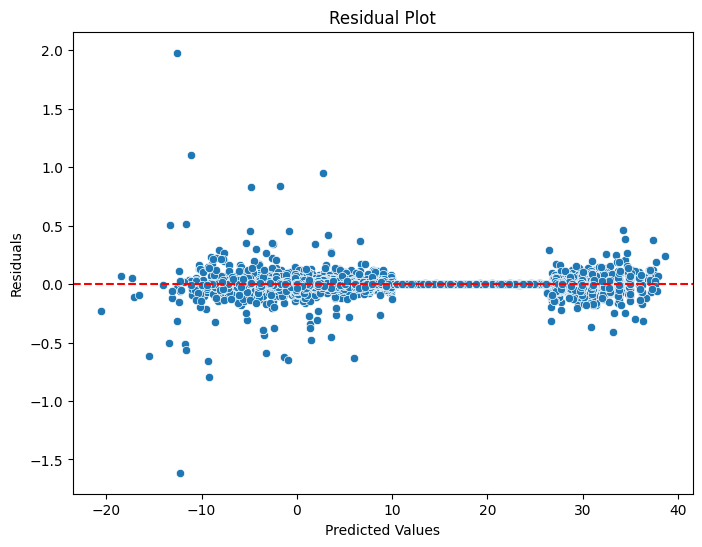

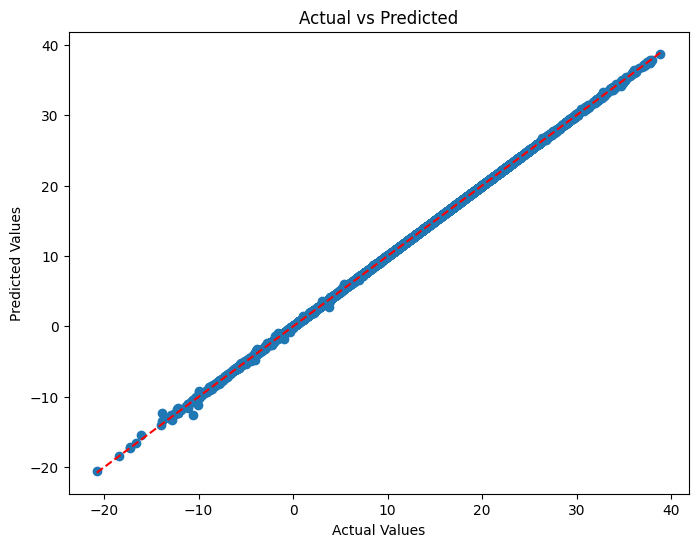

Mean Squared Error RF: 0.0016724555923823567


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
mse_rf = train_evaluate_and_visualize(rf, Xtrain, Ytrain, Xtest, Ytest)
print("Mean Squared Error RF:", mse_rf)


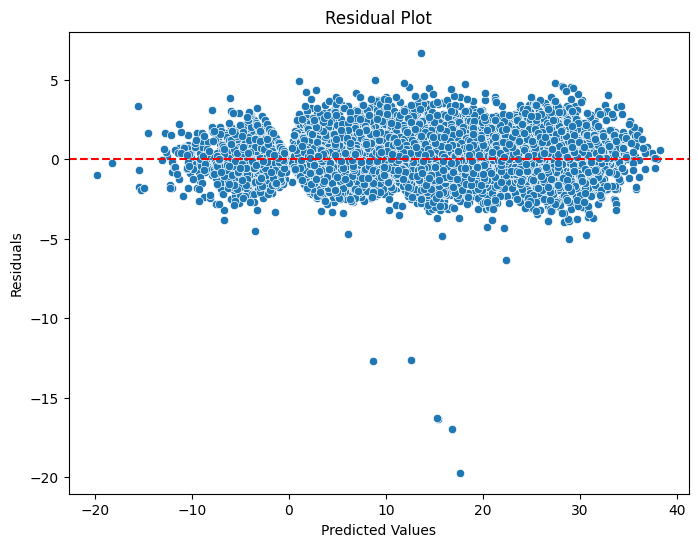

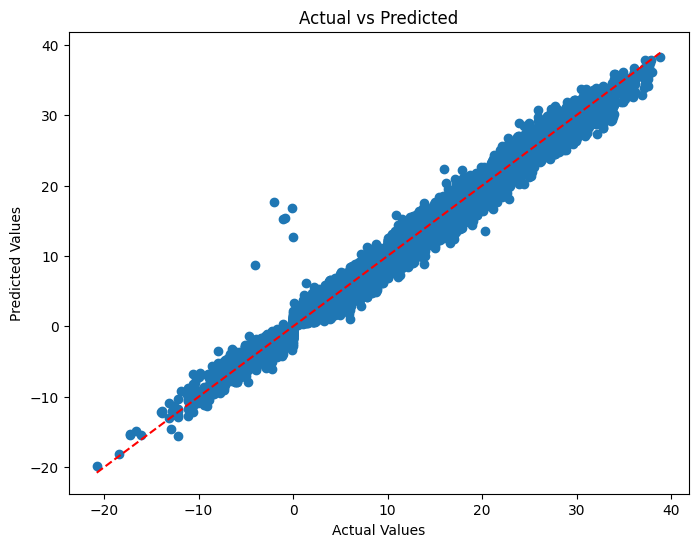

Mean Squared Error: 1.1812134767018296


In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
mse_rf_pca = train_evaluate_and_visualize(rf, pca_train, Ytrain, pca_test, Ytest)
print("Mean Squared Error:", mse_rf_pca)

Lasso Regression with Cross Validation

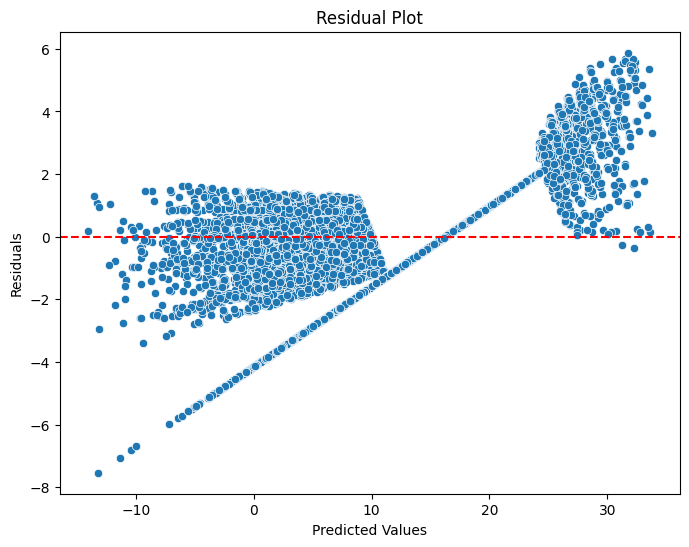

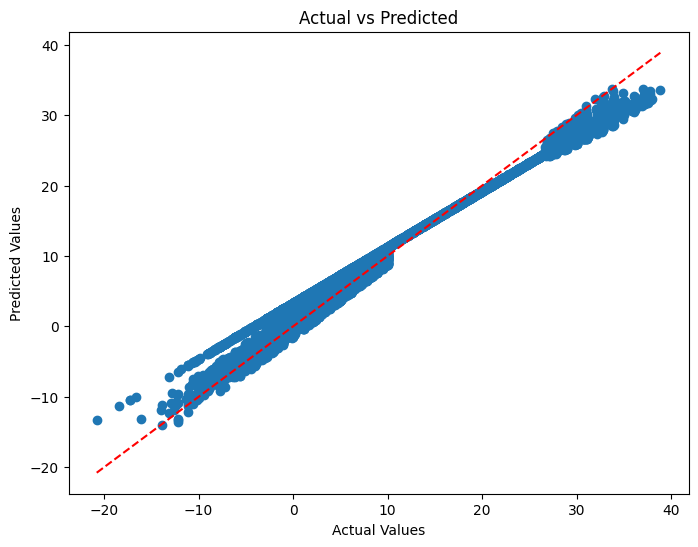

Mean Squared Error: 2.176202131587492


In [23]:
lasso = Lasso(alpha=1.0)
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(lasso, Xtrain, Ytrain, cv=kf, scoring='r2')
mse_lasso = train_evaluate_and_visualize(lasso, Xtrain, Ytrain, Xtest, Ytest)
print("Mean Squared Error:", mse_lasso)

In [24]:
for i, score in enumerate(scores, start=1):
    print(f'Fold {i}: R-squared = {score:.4f}')
mean_r2 = np.mean(scores)
std_r2 = np.std(scores)
print(f'Mean R-squared: {mean_r2:.4f}')
print(f'Standard Deviation of R-squared: {std_r2:.4f}')

Fold 1: R-squared = 0.9761
Fold 2: R-squared = 0.9758
Fold 3: R-squared = 0.9761
Fold 4: R-squared = 0.9756
Fold 5: R-squared = 0.9759
Fold 6: R-squared = 0.9762
Fold 7: R-squared = 0.9767
Fold 8: R-squared = 0.9761
Fold 9: R-squared = 0.9753
Fold 10: R-squared = 0.9754
Mean R-squared: 0.9759
Standard Deviation of R-squared: 0.0004


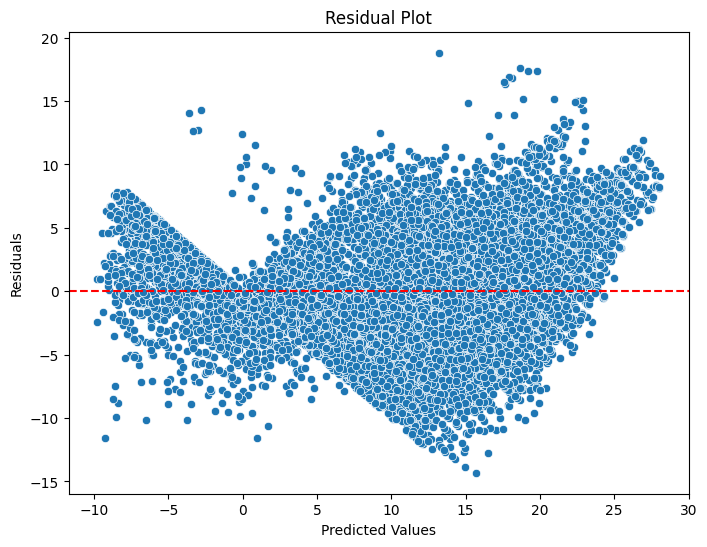

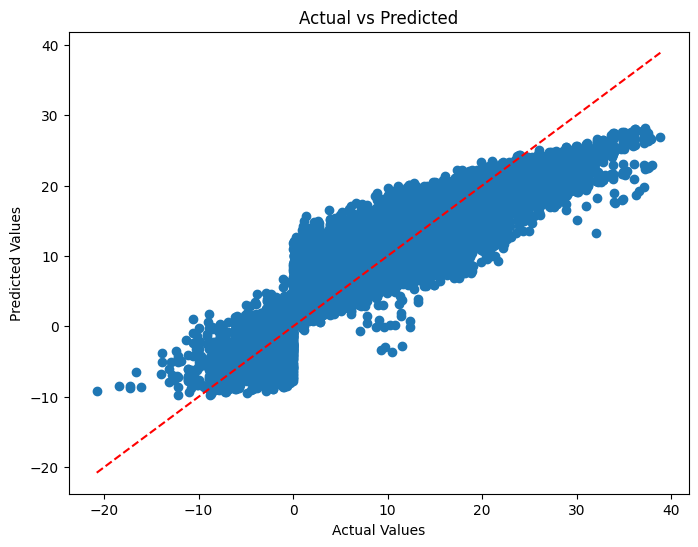

Mean Squared Error: 19.072239102601184


In [25]:
lasso = Lasso(alpha=1.0)
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(lasso, pca_train, Ytrain, cv=kf, scoring='r2')
mse_lasso_pca = train_evaluate_and_visualize(lasso, pca_train, Ytrain, pca_test, Ytest)
print("Mean Squared Error:", mse_lasso_pca)

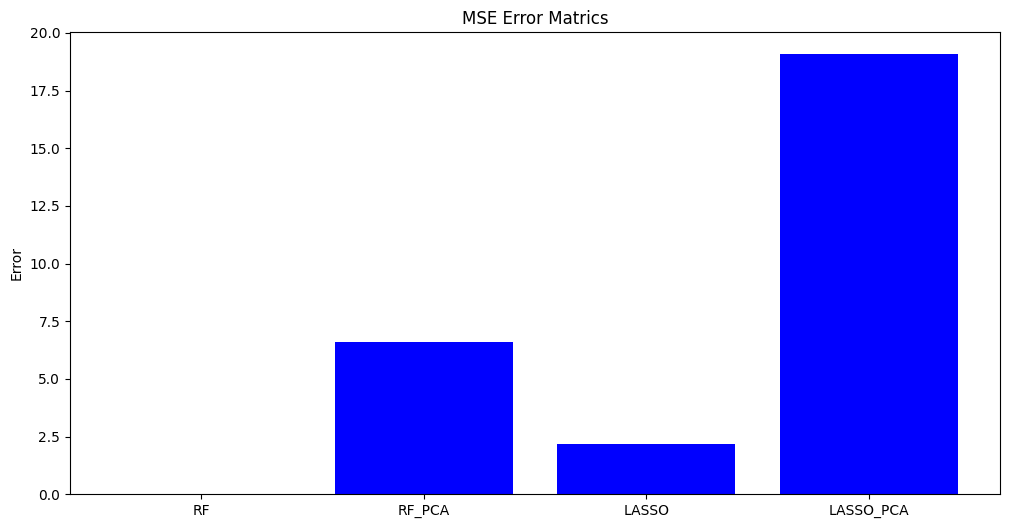

In [26]:
metrics = {'RF': mse_rf, 'RF_PCA': mse_rf_pca, 'LASSO': mse_lasso , 'LASSO_PCA':mse_lasso_pca}
plt.figure(figsize=(12, 6))
plt.bar(metrics.keys(), metrics.values(), color='blue')
plt.ylabel("Error")
plt.title("MSE Error Matrics")
plt.show()
